In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [ ]:
# Load the data
# trainPath = "./processing/dataTrain.csv"
# validationPath = "./processing/dataValidation.csv"
# testPath = "./processing/dataTest.csv"
trainPath = "./archive/interactions_train.csv"

# Read the data
trainData = pd.read_csv(trainPath)

In [ ]:
trainData.head()

In [ ]:
# Load the data
PP_recipes_path = "./archive/PP_recipes.csv"

# Read the data
PP_recipes_data = pd.read_csv(PP_recipes_path)


In [ ]:
RAW_recipes_path = "./archive/RAW_recipes.csv"
RAW_recipes_data = pd.read_csv(RAW_recipes_path)

In [86]:
PP_users_path = "./archive/PP_users.csv"
PP_users_data = pd.read_csv(PP_users_path)

31

In [ ]:
# load features
tags_pca_path = "./processing/pca_data.txt"
tags_pca = []
with open(tags_pca_path, "r") as f:
    for line in f:
        tags_pca.append(line)        
    tags_pca = np.array(tags_pca)

In [97]:
user_avg_rating_path = "./processing/avg_ratings_user.txt"
user_avg_rating = {}
with open(user_avg_rating_path, "r") as f:
    for line in f:
        line = line.split(", ")
        user_avg_rating[int(line[0])] = float(line[1])


In [99]:
all_user_rating_avg = sum(user_avg_rating.values())/len(user_avg_rating.values())

In [100]:
all_user_rating_avg 

4.451941452404339

In [ ]:
recipe_avg_rating_path = "./processing/avg_ratings_recipe.txt"
recipe_avg_rating = {}
with open(recipe_avg_rating_path, "r") as f:
    for line in f:
        recipe_i, avg_rating = line.split(", ")
        recipe_avg_rating[int(recipe_i)] = float(avg_rating.rstrip())


In [ ]:
all_recipes_rating_avg = sum(np.array(list(recipe_avg_rating.values()))) / len(recipe_avg_rating)

In [ ]:
all_recipes_rating_avg

In [ ]:
recipe_ratings_count_path = "./processing/recipe_ratings_count.txt"
recipe_ratings_count = {}
with open(recipe_ratings_count_path, "r") as f:
    for line in f:
        recipe_i, count = line.split(", ")
        recipe_ratings_count[int(recipe_i)] = int(count.rstrip())

In [ ]:
all_recipes_rating_count_avg = sum(np.array(list(recipe_ratings_count.values()))) / len(recipe_ratings_count)

In [ ]:
all_recipes_rating_count_avg

In [ ]:
nutritions = RAW_recipes_data.loc[0, 'nutrition']
nutritions

In [101]:

X = []
y = []

for index, row in trainData.iterrows():
    # Access the values of each column in the current row
    rating = row['rating']
    recipe_idx = row['i']
    recipe_id = row['recipe_id']
    user_idx = row['u']
    calorie_level = PP_recipes_data.loc[PP_recipes_data['i'] == recipe_idx, 'calorie_level'].values[0]
    
    d = []
    
    # techniques = PP_recipes_data.loc[PP_recipes_data['i'] == recipe_idx, 'techniques'].values[0]
    # techniques = eval(techniques)
    
    # nutrition = RAW_recipes_data.loc[RAW_recipes_data['id'] == recipe_id, 'nutrition'].values[0]
    # nutrition = eval(nutrition)
    # d.extend(nutrition)
    
    # tag_pca = tags_pca[pca_idx].split()
    # tag_pca = list(map(float, tag_pca))  # Convert the values from string to float
    
    n_items = PP_users_data.loc[PP_users_data['u'] == user_idx, 'n_items'].values[0]
    d.append(n_items)
    
    minutes = RAW_recipes_data.loc[RAW_recipes_data['id'] == recipe_id, 'minutes'].values[0]
    d.append(minutes)
    
    n_steps = RAW_recipes_data.loc[RAW_recipes_data['id'] == recipe_id, 'n_steps'].values[0]
    d.append(n_steps)
    
    n_ingredients = RAW_recipes_data.loc[RAW_recipes_data['id'] == recipe_id, 'n_ingredients'].values[0]
    d.append(n_ingredients)
    
    if user_idx in user_avg_rating:
        d.append(user_avg_rating[user_idx])
    else:
        d.append(all_user_rating_avg)
    

    if recipe_idx in recipe_avg_rating:
        d.append(recipe_avg_rating[recipe_idx])
    else:
        d.append(all_recipes_rating_avg)
    
    if recipe_idx in recipe_ratings_count:
        d.append(recipe_ratings_count[recipe_idx])
    else:
        d.append(all_recipes_rating_count_avg)
    
    d.append(calorie_level)

    X.append(d)
    y.append(rating)


In [102]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV


# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10]}

# Create the Ridge regression model
model = Ridge()

# Create the GridSearchCV object
grid_search = GridSearchCV(model, param_grid, cv=5)

# Fit the model to the training data
grid_search.fit(X_train, y_train)

# Get the best parameter value
best_alpha = grid_search.best_params_['alpha']

# Create and train the model with the best parameter value
model = Ridge(alpha=best_alpha)
model.fit(X_train, y_train)

# Predict the ratings
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

best_alpha, mse, r2, np.sqrt(mse)

(10, 0.580110071415377, 0.36678757718499566, 0.7616495725826786)

In [103]:
corr_matrix_data = []

for i in range(len(X)):
    row_data = X[i] + [y[i]]
    corr_matrix_data.append(row_data)

corr_matrix_data


[[4, 75, 6, 10, 5.0, 4.944444444444445, 36, 1, 5.0],
 [4, 149, 15, 20, 5.0, 5.0, 2, 1, 5.0],
 [2, 275, 19, 16, 4.5, 4.44, 25, 2, 5.0],
 [2, 125, 18, 8, 4.5, 4.416666666666667, 12, 0, 4.0],
 [4, 0, 12, 6, 5.0, 4.875, 8, 2, 5.0],
 [4, 36, 7, 13, 5.0, 4.5875, 80, 0, 5.0],
 [153, 0, 12, 13, 4.57516339869281, 4.666666666666667, 9, 1, 5.0],
 [153, 40, 8, 6, 4.57516339869281, 5.0, 1, 0, 5.0],
 [153, 0, 12, 13, 4.57516339869281, 4.0, 3, 1, 4.0],
 [153, 5, 3, 5, 4.57516339869281, 5.0, 2, 1, 5.0],
 [3, 79, 17, 18, 2.6666666666666665, 3.6666666666666665, 3, 2, 3.0],
 [153, 75, 7, 13, 4.57516339869281, 5.0, 1, 0, 5.0],
 [5, 75, 13, 13, 5.0, 4.666666666666667, 6, 1, 5.0],
 [33, 0, 4, 6, 4.606060606060606, 4.4, 5, 0, 3.0],
 [33, 25, 10, 14, 4.606060606060606, 3.857142857142857, 7, 1, 5.0],
 [7, 0, 9, 9, 4.857142857142857, 3.5, 2, 0, 4.0],
 [7, 60, 9, 10, 4.857142857142857, 5.0, 3, 0, 5.0],
 [7, 85, 13, 5, 4.857142857142857, 5.0, 4, 1, 5.0],
 [153, 45, 16, 11, 4.57516339869281, 4.875, 8, 2, 5.0],
 [3

0    0.088267
1    0.000677
2    0.003222
3   -0.001719
4    0.418550
5    0.505804
6    0.002860
7   -0.003981
8    1.000000
Name: 8, dtype: float64


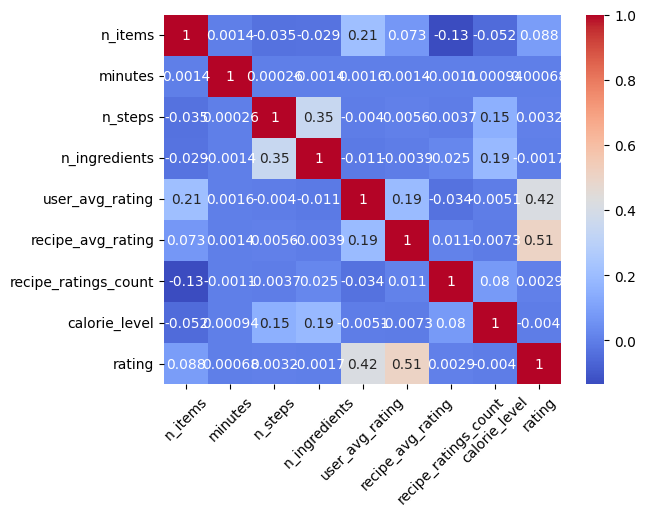

In [105]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the features to plot
features = ['n_items', 'minutes', 'n_steps', 'n_ingredients', 'user_avg_rating', 'recipe_avg_rating', 'recipe_ratings_count', 'calorie_level', 'rating']

# Convert the data to a pandas DataFrame
corr_df = pd.DataFrame(corr_matrix_data)

# Calculate the correlation matrix
corr_matrix = corr_df.corr()

last_column = corr_matrix.iloc[:, -1]
print(last_column)

# # Plot the correlation matrix as a heatmap
ax = sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Set the x-axis and y-axis labels
ax.set_xticklabels(features, rotation=45)
ax.set_yticklabels(features, rotation=0)

# Show the plot
plt.show()
